In [2]:
%pwd
%cd ..

/media/yana/discD/projects/farich-pics


In [3]:
from farichlib.DataPreprocessing import DataPreprocessing
from farichlib.DataPreprocessing import print_board
from farichlib.DataPreprocessing import create_mask
import numpy as np
import os
import pickle

%cd data/rootfiles

/media/yana/discD/projects/farich-pics/data/rootfiles


In [5]:
folder_root = '.'
rootfiles = [f for f in os.listdir(folder_root) if os.path.isfile(os.path.join(folder_root, f))]
rootfiles

['farichSimRes_e-mu-_1000MeV_25-90deg_30.0k_2020-02-07.root',
 'farichSimRes_pi-kaon-_1000MeV_0-90deg_50.0k_2020-02-11.root']

In [6]:
dp = DataPreprocessing()
dp.parse_root(*rootfiles)

In [9]:
#%%time 
H_all = []
h_all = []
for i in range(0,10000):
    if i % 5000 == 0:
        print(i)
    board, Y_res = dp.generate_board(board_size=100, N_circles=1)
    H_all.append(board)
    h_all.append(Y_res)

0
5000


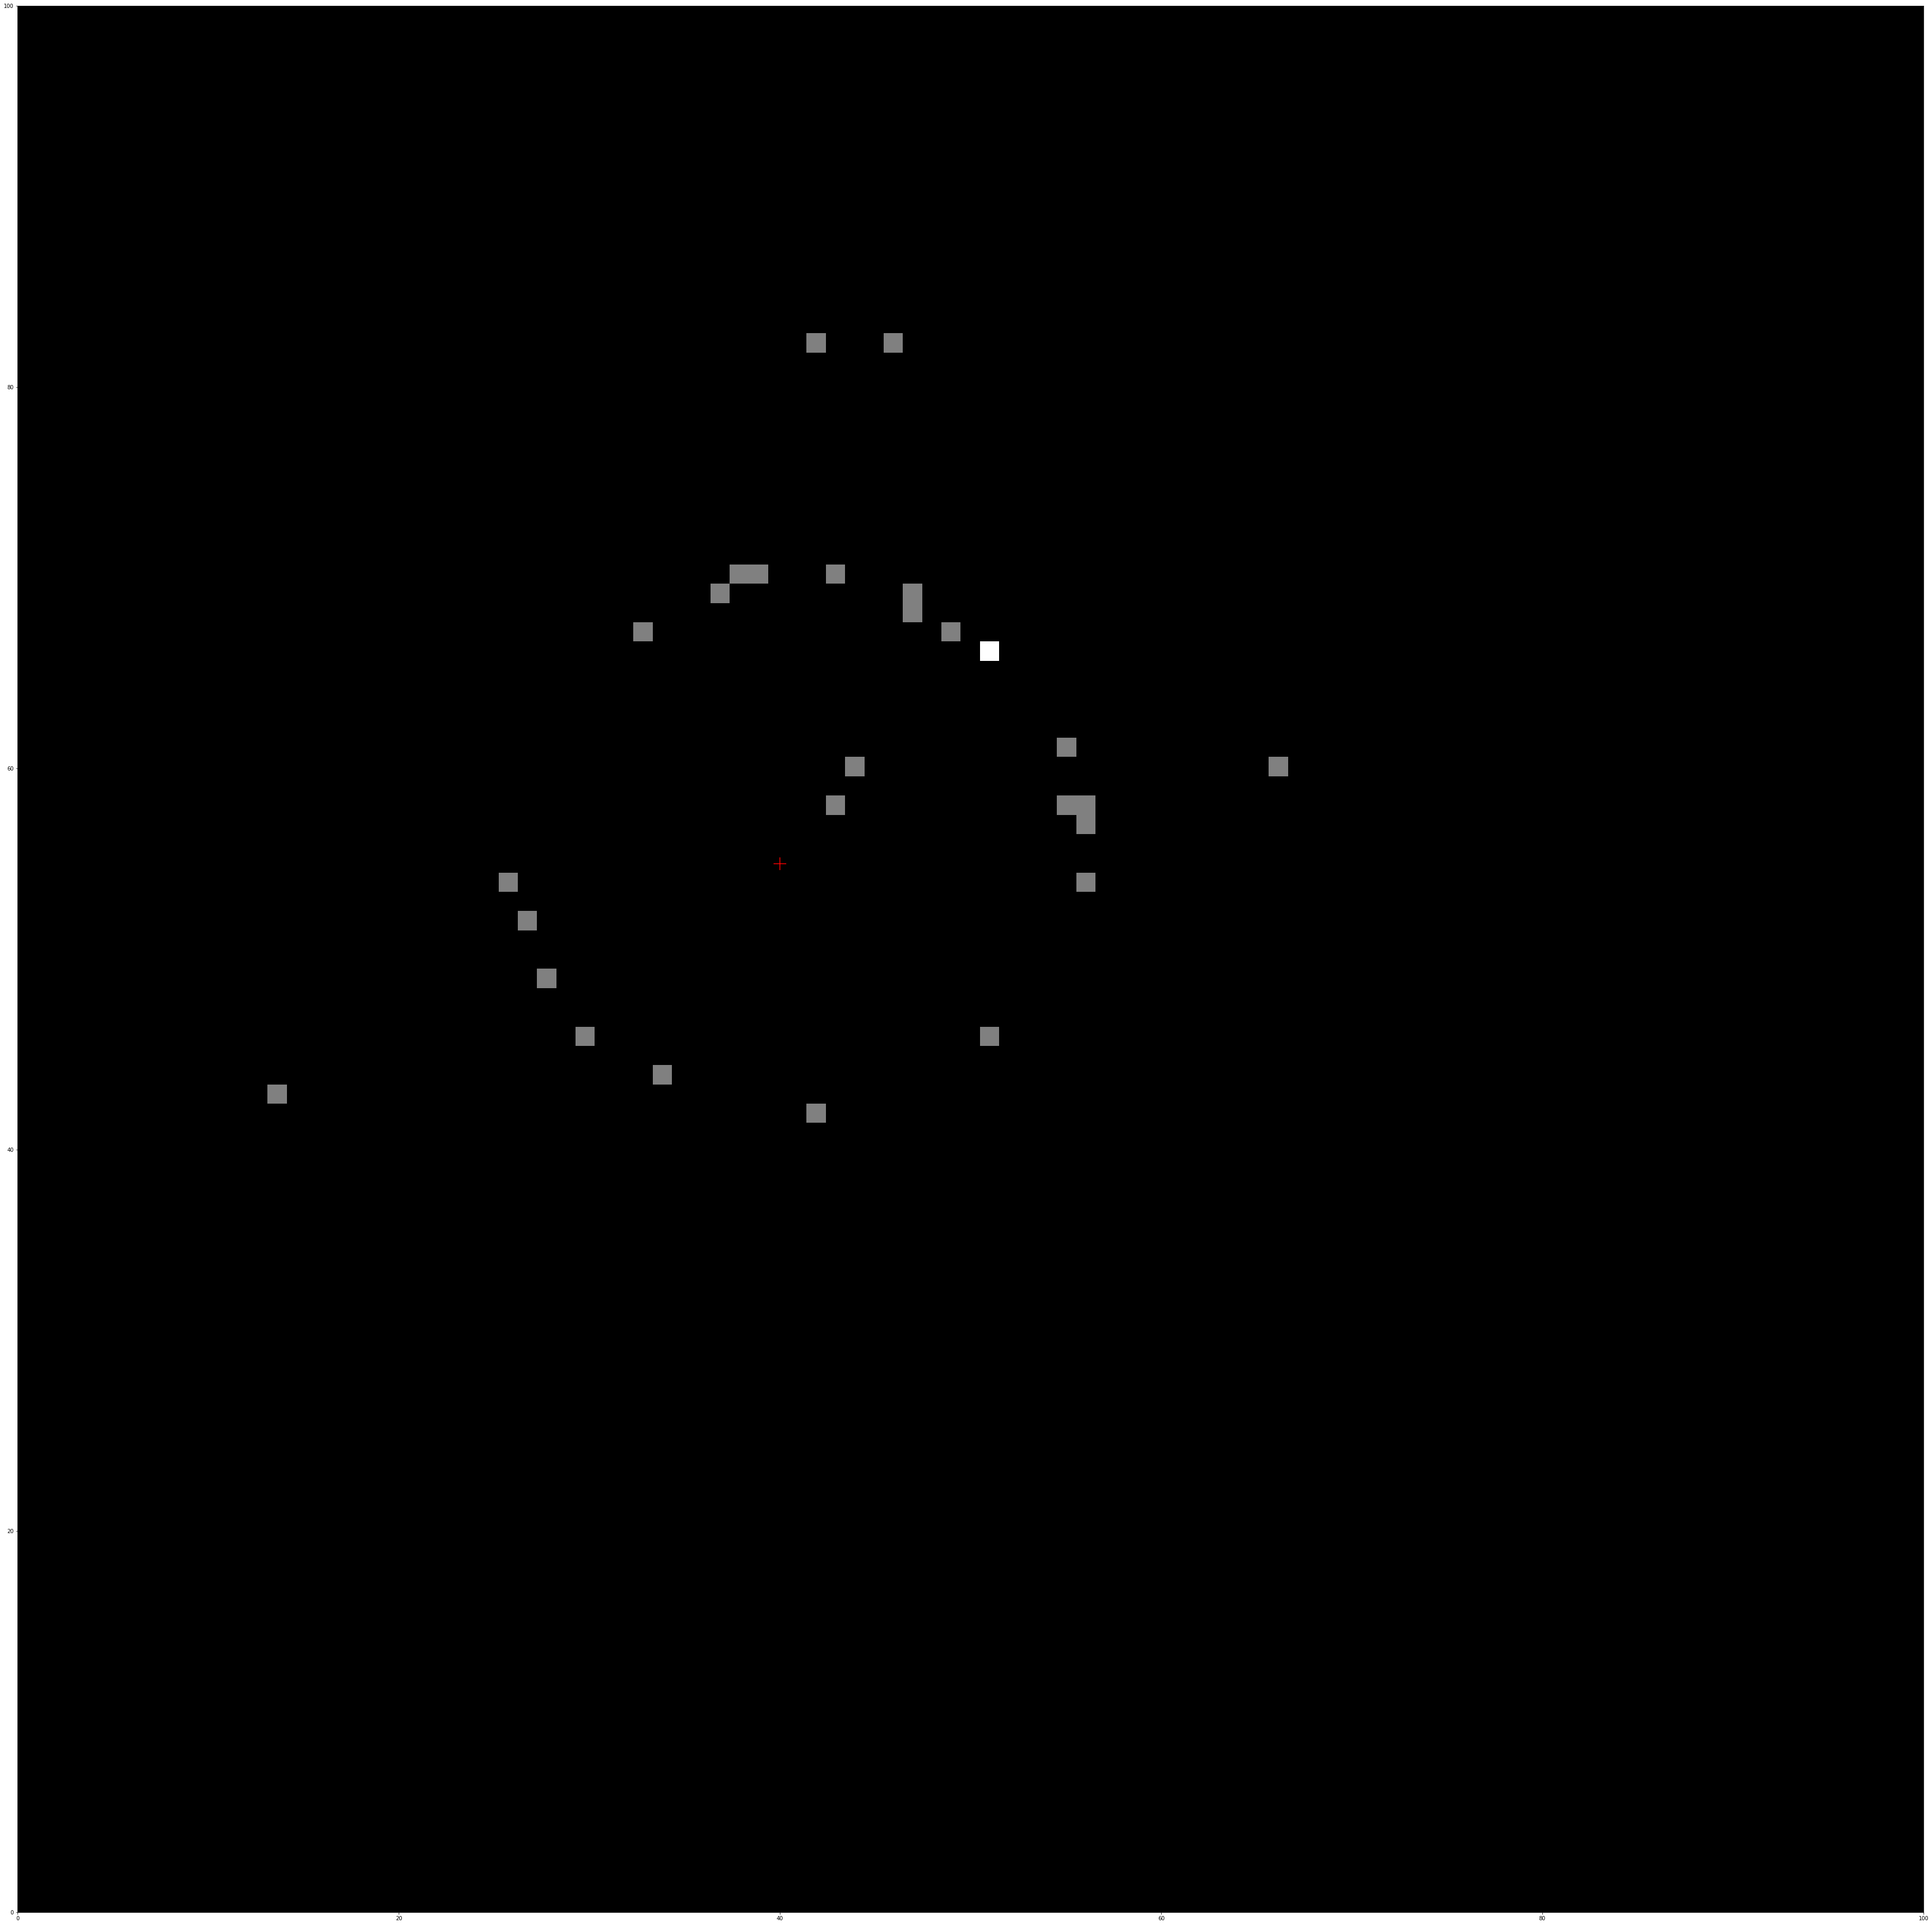

In [10]:
print_board(H_all[100], h_all[100])

In [13]:
mask_joined = create_mask(100, h_all[100])

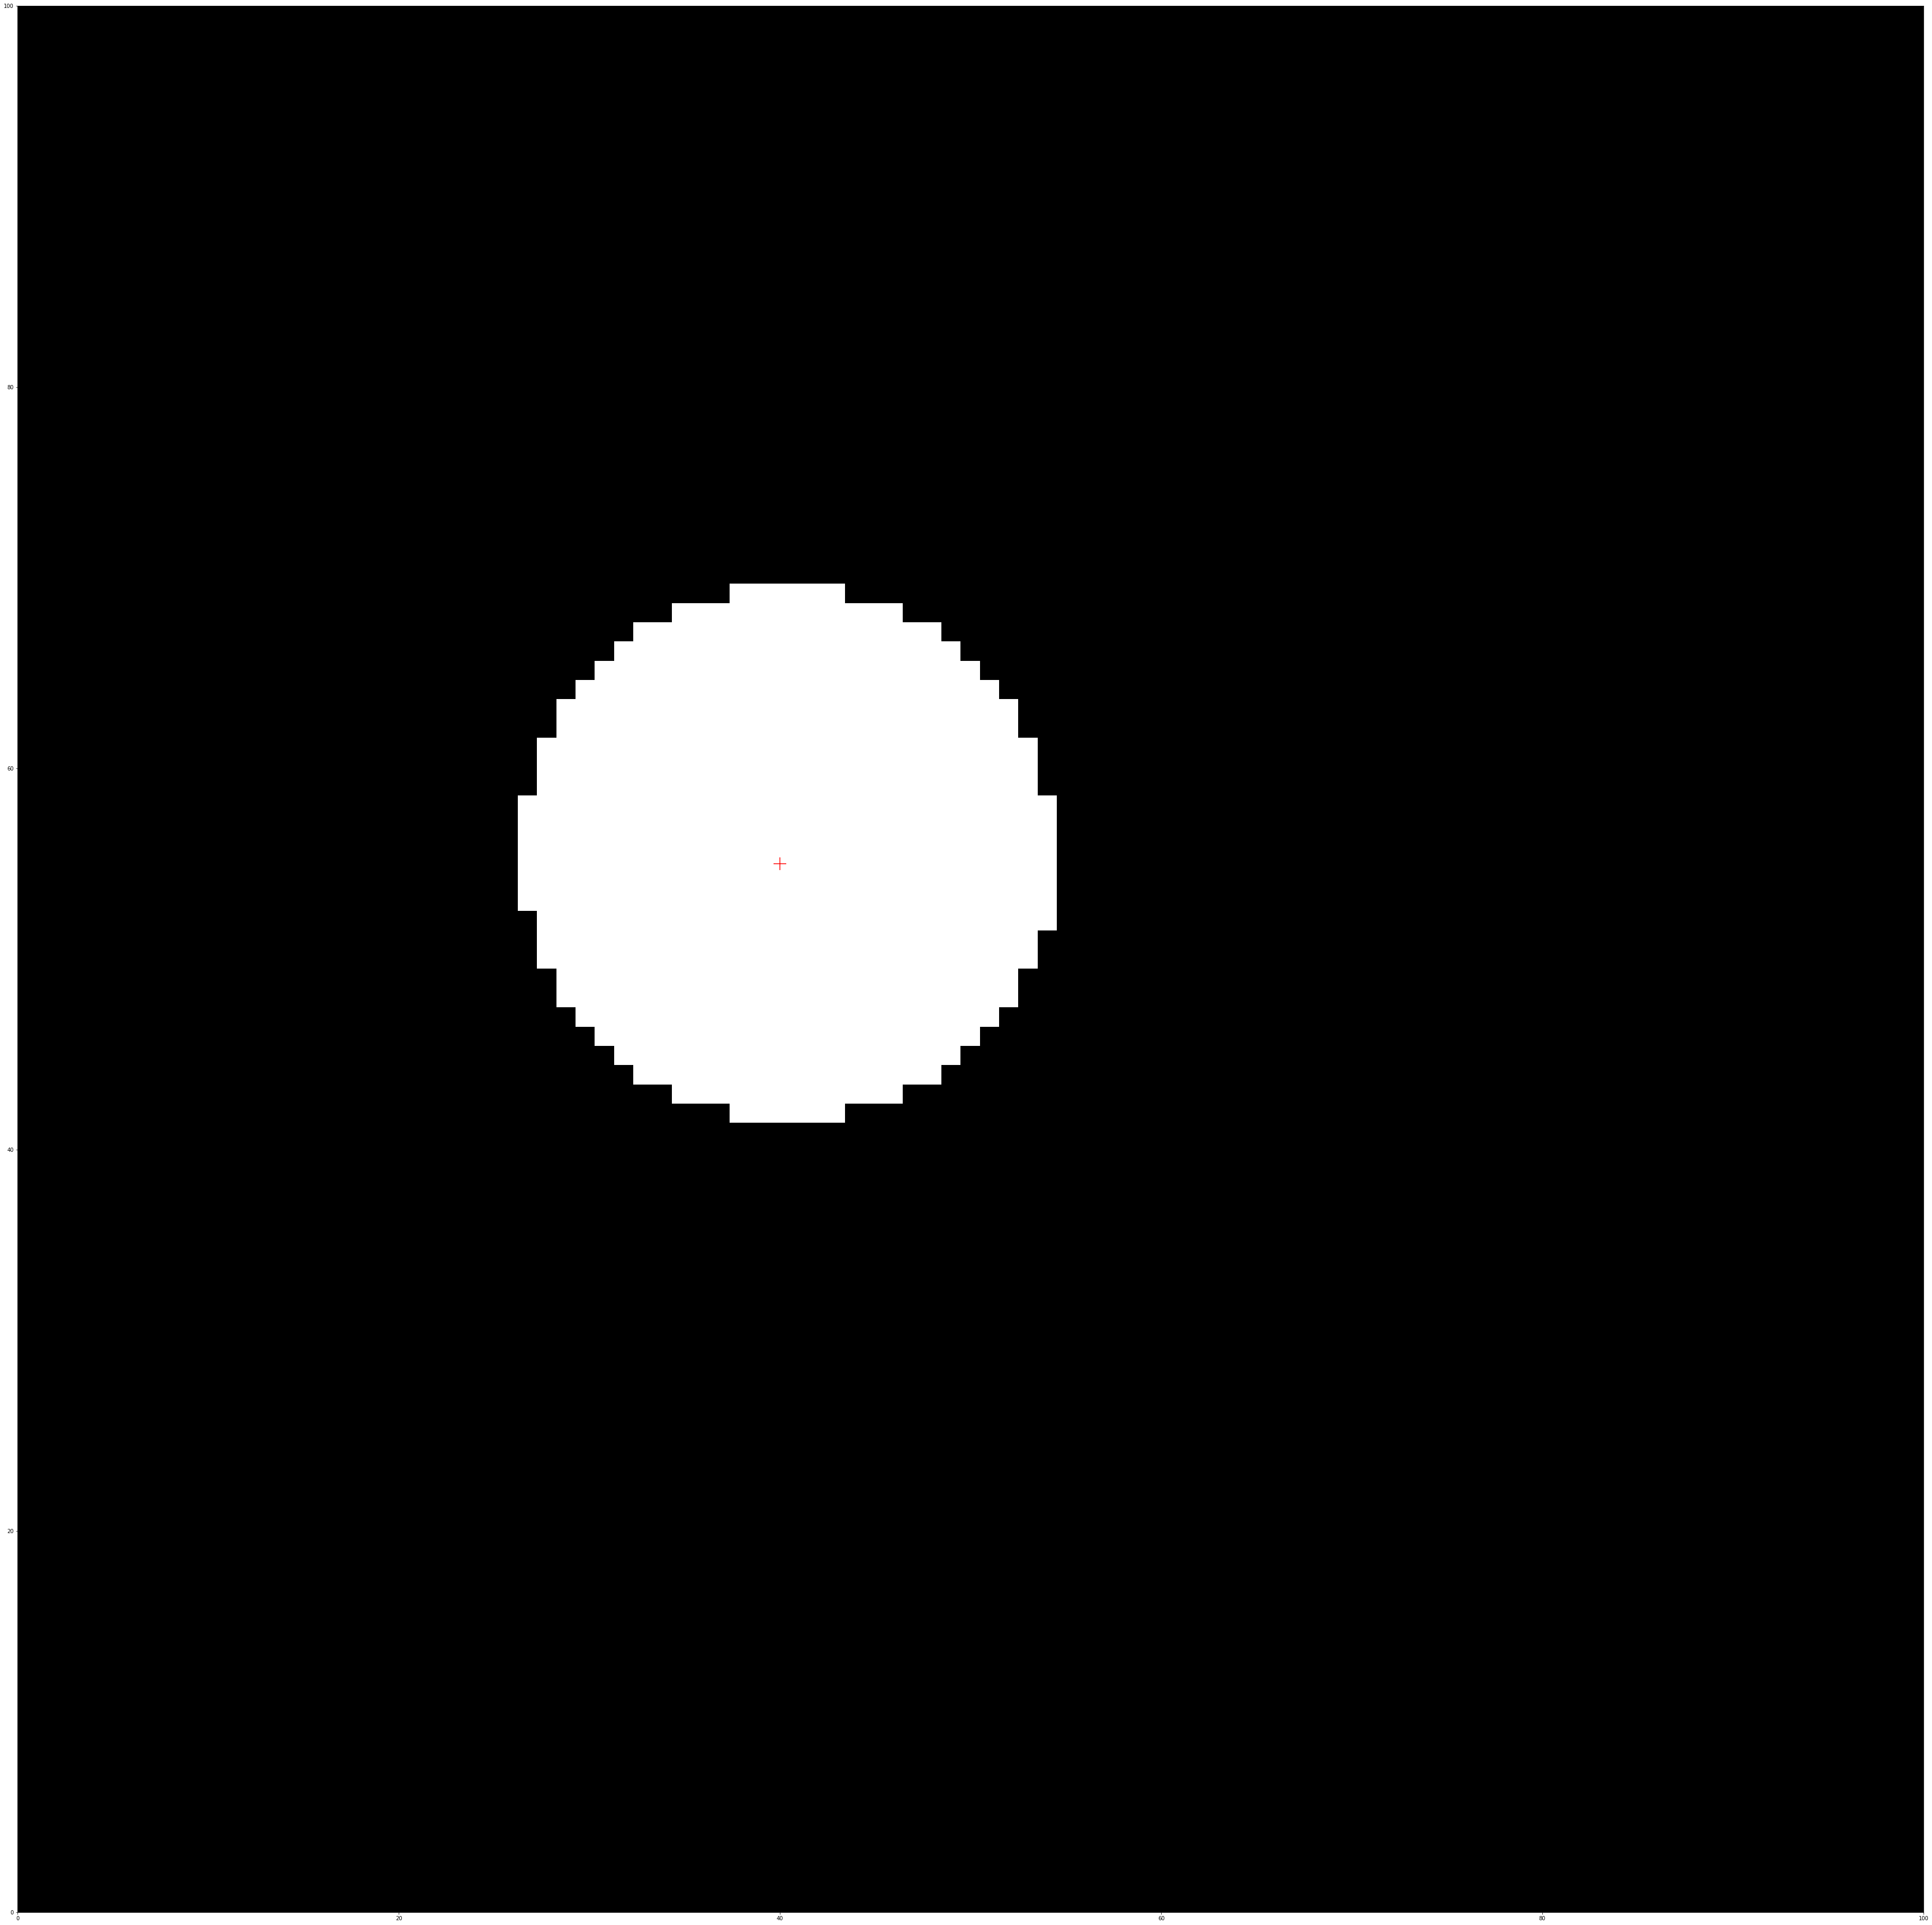

In [14]:
print_board(mask_joined[0], h_all[100][0])

In [26]:
mask = []
for index in range(len(h_all)):
    if index%500 == 0:
        print(index)
    mask.append( create_mask(100, h_all[index]) )

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500


In [29]:
with open("../dataset/dataset.pkl", "wb") as f:
    pickle.dump((H_all, h_all, mask), f)

In [30]:
with open("../dataset/dataset.pkl", "rb") as f:
    H_loaded, h_loaded, mask_loaded = pickle.load(f)

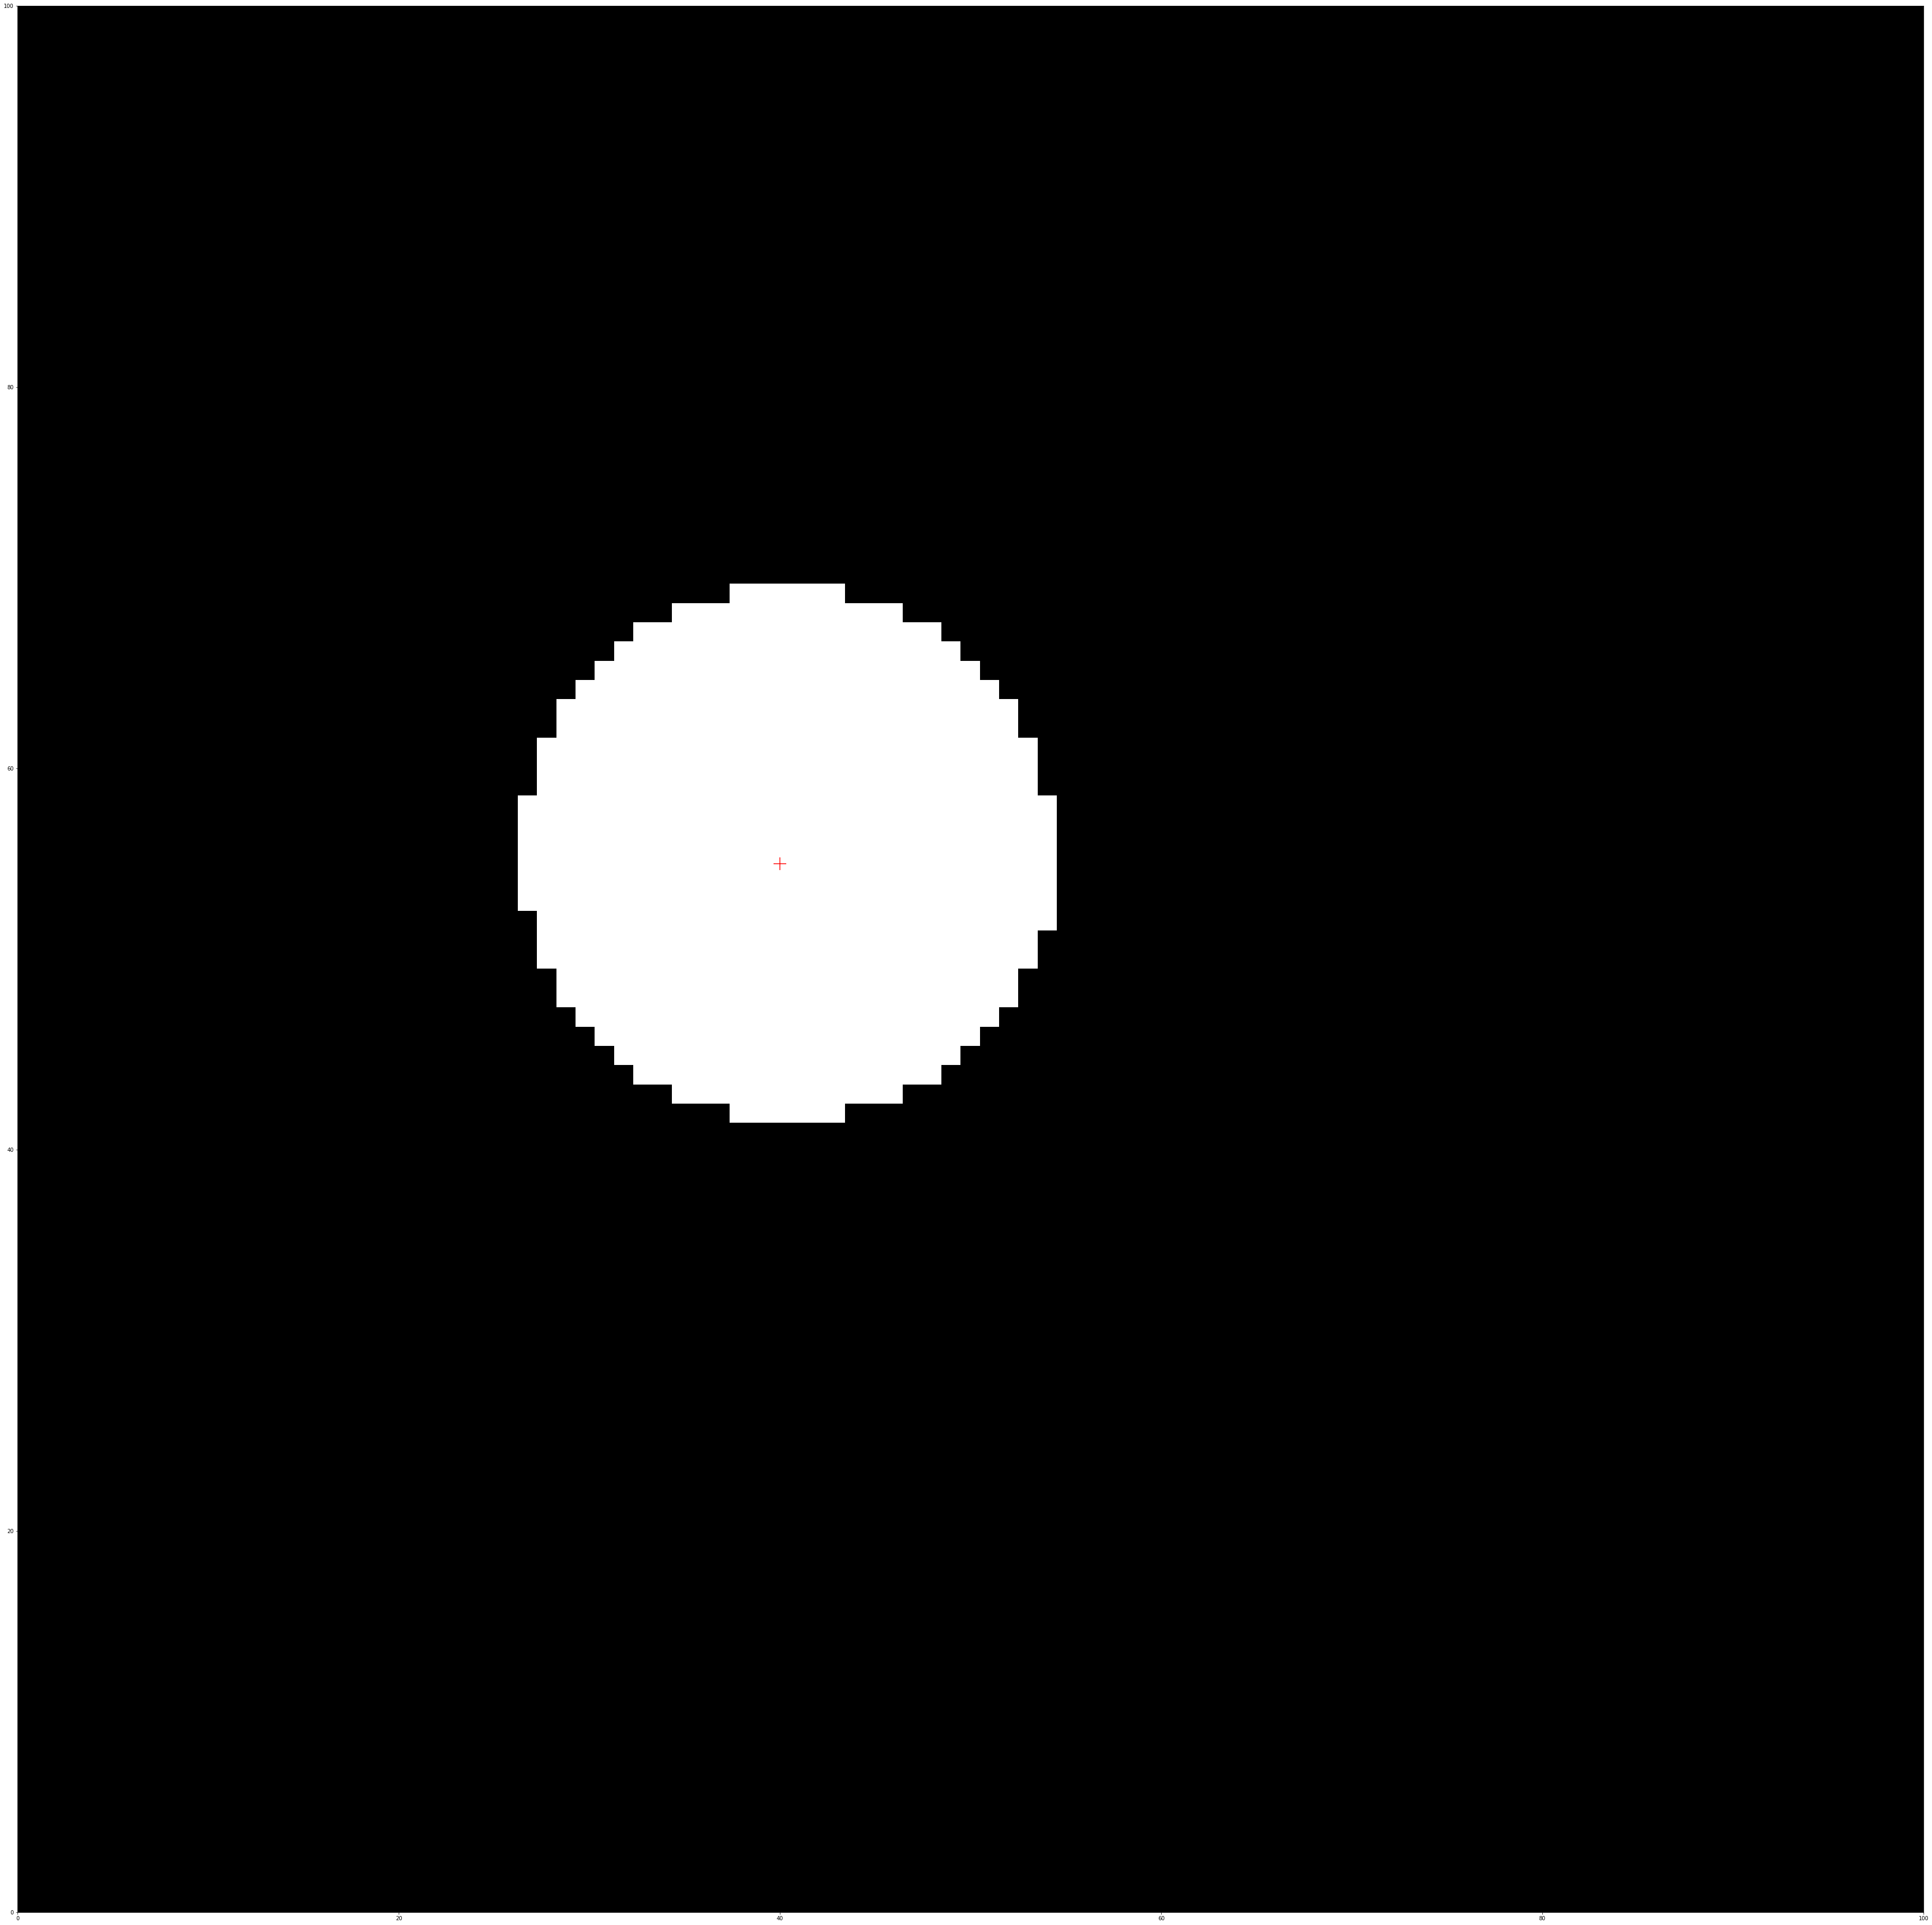

In [31]:
print_board(mask_loaded[100][0], h_loaded[100][0])

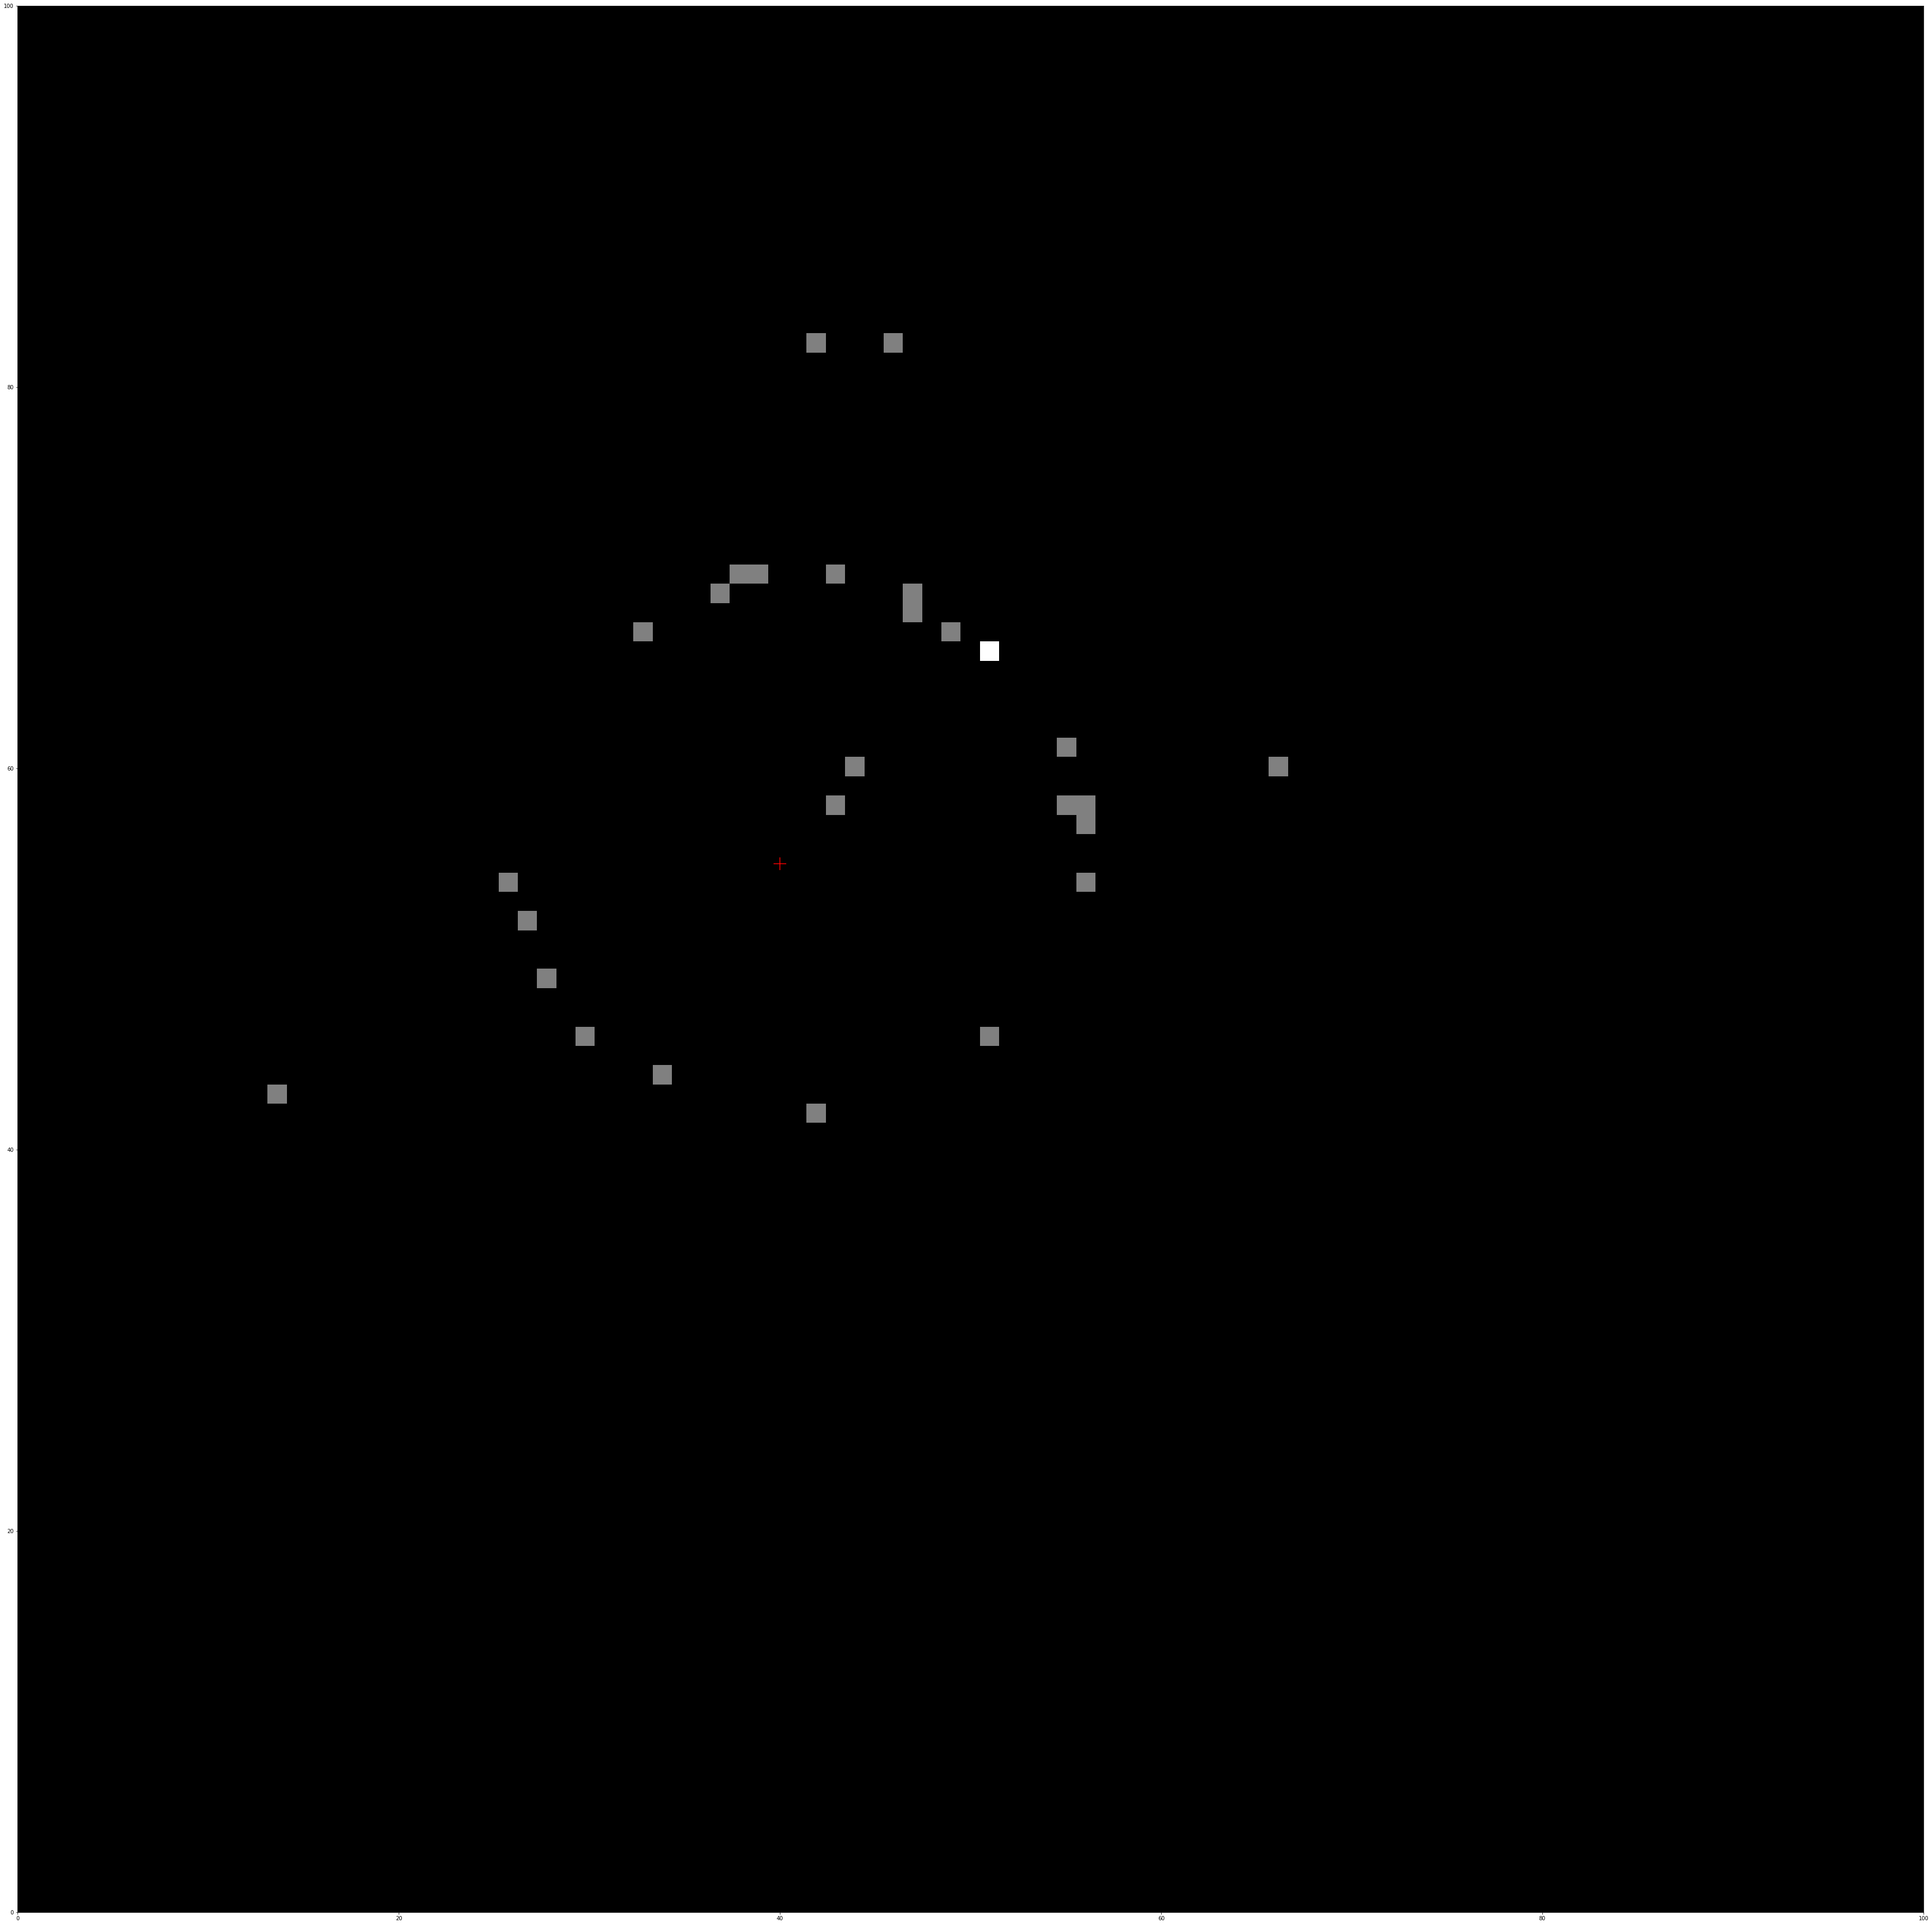

In [32]:
print_board(H_loaded[100], h_loaded[100])